In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lecture 6

## Table Review: Welcome Survey

In [2]:
# Table consists only of those who answered all 7 questions

welcome = Table.read_table('welcome_survey_fa21.csv')
welcome.show(5)

Year,Extraversion,Number of textees,Hours of sleep,Handedness,First pant leg,Sleep position
Second,8,5,6,Right-handed,Right leg in first,On your left side
Second,7,8,7.5,Right-handed,Right leg in first,On your left side
Second,6,7,7.5,Right-handed,Left leg in first,On your right side
Third,2,1,8,Right-handed,Right leg in first,On your back
Second,4,3,8,Right-handed,Left leg in first,On your stomach


In [3]:
# Largest number of textees (daily average)
max(welcome.column('Number of textees'))

100

In [4]:
welcome.where('Number of textees', are.equal_to(100))

Year,Extraversion,Number of textees,Hours of sleep,Handedness,First pant leg,Sleep position
Second,10,100,7,Right-handed,Right leg in first,On your right side


In [5]:
# How many students get at least 8 hours of sleep each night (on average)?
welcome.where('Hours of sleep', are.above_or_equal_to(8)).num_rows

396

In [6]:
# average hours of sleep
np.average(welcome.column('Hours of sleep'))

7.0426691729323307

In [7]:
# On average, how long do side-sleepers sleep?
side_sleepers = welcome.where('Sleep position', are.containing('side'))
np.average(side_sleepers.column('Hours of sleep'))

7.0288079470198674

In [8]:
# Proportion of side-sleepers
welcome.where('Sleep position', are.containing('side')).num_rows / welcome.num_rows

0.5676691729323309

In [9]:
# Create a table with only the two sleep-related columns, 
# with names 'Hours' and 'Position'
two_col = welcome.select('Hours of sleep', 'Sleep position')
sleep = two_col.relabeled('Hours of sleep', 'Hours').relabeled('Sleep position', 'Position')
sleep.show(3)

Hours,Position
6,On your left side
7.5,On your left side
7.5,On your right side


In [10]:
# Second way
two_col_new = welcome.select('Hours of sleep', 'Sleep position')
sleep_new = two_col_new.relabeled(0, 'Hours').relabeled(1, 'Position')
sleep_new.show(3)

Hours,Position
6,On your left side
7.5,On your left side
7.5,On your right side


## Discussion Question: NBA Salaries

In [11]:
nba = Table.read_table('nba_salaries.csv')
nba = nba.relabeled(3, 'SALARY').drop('TEAM')
nba.show(3)

PLAYER,POSITION,SALARY
Paul Millsap,PF,18.6717
Al Horford,C,12
Tiago Splitter,C,9.75625


In [12]:
# Question (a)
guards = nba.where('POSITION', 'PG')
guards.where('SALARY', are.above(15)).column('PLAYER')

array(['Derrick Rose', 'Kyrie Irving', 'Chris Paul', 'Russell Westbrook',
       'John Wall'],
      dtype='<U24')

In [13]:
# Question (b)
nba.drop('POSITION')
nba.num_columns

3

## Census ##

In [14]:
full = Table.read_table('nc-est2019-agesex-res.csv')
full

SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,0,3944153,3944160,3951430,3963092,3926570,3931258,3954787,3983981,3954773,3893990,3815343,3783052
0,1,3978070,3978090,3957730,3966225,3977549,3942698,3948891,3973133,4002903,3972711,3908830,3829599
0,2,4096929,4096939,4090621,3970654,3978925,3991740,3958711,3966321,3991349,4020045,3987032,3922044
0,3,4119040,4119051,4111688,4101644,3981531,3991017,4005928,3974351,3982984,4006946,4033038,3998665
0,4,4063170,4063186,4077346,4121488,4111490,3992502,4004032,4020292,3989750,3997280,4018719,4043323
0,5,4056858,4056872,4064521,4087054,4131049,4121876,4004576,4017589,4035033,4003452,4008443,4028281
0,6,4066381,4066412,4072904,4074531,4096631,4141126,4133372,4017388,4031568,4048018,4014057,4017227
0,7,4030579,4030594,4042990,4082821,4084175,4106756,4152666,4145872,4030888,4044139,4058370,4022319
0,8,4046486,4046497,4025501,4052773,4092559,4094513,4118349,4165033,4158848,4042924,4054236,4066194
0,9,4148353,4148369,4125312,4035319,4062726,4103052,4106068,4130887,4177895,4170813,4053179,4061874


In [15]:
partial = full.select('SEX', 'AGE', 'POPESTIMATE2014', 'POPESTIMATE2019')
partial.show(5)

SEX,AGE,POPESTIMATE2014,POPESTIMATE2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [16]:
us_pop = partial.relabeled(2, '2014').relabeled(3, '2019')
us_pop.show(5)

SEX,AGE,2014,2019
0,0,3954787,3783052
0,1,3948891,3829599
0,2,3958711,3922044
0,3,4005928,3998665
0,4,4004032,4043323


In [17]:
us_pop.where('AGE', are.above_or_equal_to(100)).sort('AGE')

SEX,AGE,2014,2019
0,100,70685,100322
1,100,13577,23472
2,100,57108,76850
0,999,318301008,328239523
1,999,156654424,161657324
2,999,161646584,166582199


## 2019 Sex Ratios ##

In [18]:
us_pop_2019 = us_pop.drop('2014')
us_pop_2019.show(3)

SEX,AGE,2019
0,0,3783052
0,1,3829599
0,2,3922044


In [19]:
all_ages = us_pop_2019.where('AGE', are.equal_to(999))
all_ages

SEX,AGE,2019
0,999,328239523
1,999,161657324
2,999,166582199


In [20]:
infants = us_pop_2019.where('AGE', are.equal_to(0))
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [21]:
females_all_rows = us_pop_2019.where('SEX', are.equal_to(2))
females = females_all_rows.where('AGE', are.not_equal_to(999))
females.show(3)

SEX,AGE,2019
2,0,1847935
2,1,1871014
2,2,1916500


In [22]:
males_all_rows = us_pop_2019.where('SEX', are.equal_to(1))
males = males_all_rows.where('AGE', are.not_equal_to(999))
males.show(3)

SEX,AGE,2019
1,0,1935117
1,1,1958585
1,2,2005544


In [23]:
f_to_m_ratios = females.column(2) / males.column(2)

ratios = Table().with_columns(
    'Age', females.column('AGE'),
    'F:M Ratio', f_to_m_ratios
)

ratios

Age,F:M Ratio
0,0.954947
1,0.955289
2,0.955601
3,0.957242
4,0.956177
5,0.954338
6,0.956801
7,0.956633
8,0.955161
9,0.959278


In [24]:
ratios.sort('Age', descending=True)

Age,F:M Ratio
100,3.27411
99,2.91367
98,2.65926
97,2.5868
96,2.41969
95,2.34042
94,2.2271
93,2.10192
92,1.99252
91,1.90275


## Line Plot ##

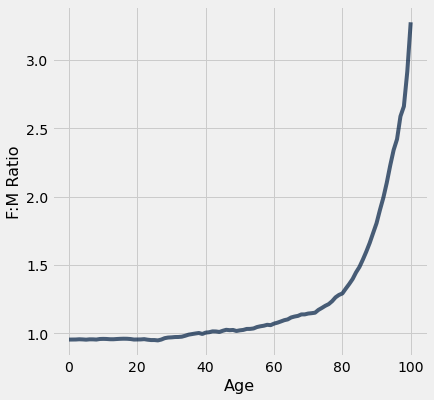

In [25]:
ratios.plot('Age', 'F:M Ratio')

## Optional: Adding a Title to a Plot ##

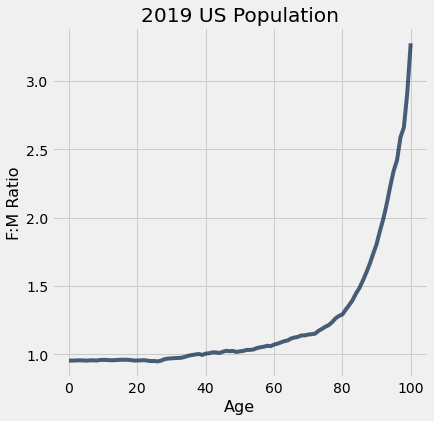

In [26]:
ratios.plot('Age', 'F:M Ratio')
plots.title('2019 US Population');

## Optional: set_format and PercentFormatter ##

In [27]:
infants

SEX,AGE,2019
0,0,3783052
1,0,1935117
2,0,1847935


In [28]:
total_infants_2019 = infants.column('2019').item(0)
total_infants_2019

3783052

In [29]:
infants = infants.with_column(
    'Proportion', infants.column('2019')/total_infants_2019
)
infants

SEX,AGE,2019,Proportion
0,0,3783052,1
1,0,1935117,0.511523
2,0,1847935,0.488477


In [30]:
# A more easily readable display
# Displays proportions as percents
infants.set_format('Proportion', PercentFormatter)

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%


In [31]:
# Once the format is set, it remains.
infants

SEX,AGE,2019,Proportion
0,0,3783052,100.00%
1,0,1935117,51.15%
2,0,1847935,48.85%
